In [1]:
from src.printGraph import draw_graph as draw_graph
from src.Graph import Graph
import src.triangleAlgorithms as Ta

from test_ import HelperClass as Hc
import test_.plots.Performancetest_barplot as PerfTri
import test_.plots.TestsOnPowerNetworks as powerNetTest

import networkx as nx

### Aufgabe 3 - Dreiecke

Algorithmen zum Aufzählen von Dreiecken. 
Hier haben wir uns an "Triangle Listing Algorithms: Back from the Diversion" von Mark Ortmann und Ulrik Brandes sowie "Algorithmic Aspects of Triangle-Based Network Analysis" von Thomas Schank orientiert.

Es wurden insgesamt 4 verschiedene Algorithmen implementiert. Zurückgegeben wird ein Tupel, wo der erste Wert die Anzahl an Dreiecken aus dem Graph zurückgibt. Der zweite Wert enthält die Aufzählung der Dreiecke als Liste von Tupeln.

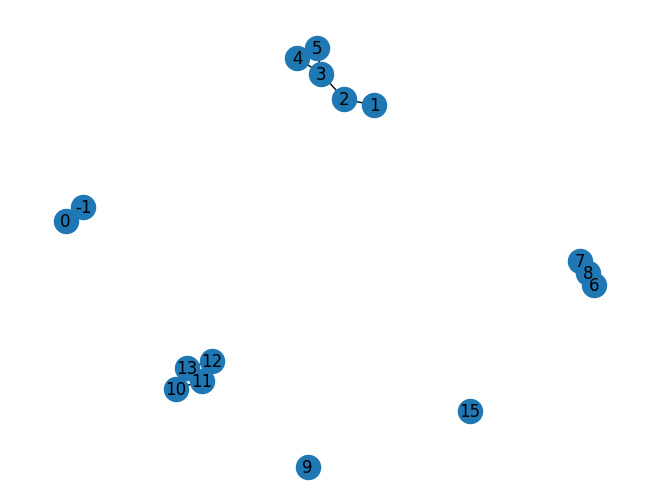

In [2]:
G, _, _ = Hc.create_graph()
G.add_edge(11, 13)
G.add_edge(7, 8)

draw_graph(G, True)

Der erste Algorithmus ist im Prinzip ein trivialer Algorithmus, der die combinations Funktions aus dem iter Package nutzt. Im Prinzip werden für jeden Knoten alls Paare von Nachbarn betrachtet und nachgeschaut ob diese eine Verbindung haben

- Laufzeit: TODO
- Speicher: TODO

In [3]:
print(Ta.algorithm_with_combinations(G))

(4, [('3', '4', '5'), ('6', '7', '8'), ('10', '11', '13'), ('11', '12', '13')])


Der zweite Algorithmus ist der Node Iterator. Das heißt es wird über alle Knoten gegangen und jeweils alle Nachbarn betrachtet und dann geschaut ob diese Nachbarn sind. Hier wurden 3 verschiedene Ansätze implementiert: 

1) Ohne Sortierung - die Knoten wurden einfach der Reihe nach abgearbeitet  
2) Degenercy Sortierung - die Knoten wurden vom kleinsten Grad zum höchsten in die Degeneracy Ordnung gebracht
3) Knotengrad Sortierung -  Ein Dictionary wird erstellt mit keys Knotengrad und values Liste an Knoten die diesen Knotengrad besitzen

- Laufzeit: TODO
- Speicher: TODO

In [4]:
print(Ta.algorithm_node_iterator_without_sorting(G))
print(Ta.algorithm_node_iterator_degeneracy_sorting(G))
print(Ta.algorithm_node_iterator(G))

(4, [('3', '4', '5'), ('6', '7', '8'), ('10', '11', '13'), ('11', '12', '13')])
(4, [('3', '4', '5'), ('12', '11', '13'), ('13', '10', '11'), ('8', '7', '6')])
(4, [('3', '4', '5'), ('11', '10', '13'), ('11', '12', '13'), ('6', '7', '8')])


Der dritte Algorithmus ist der von Chiba und Nishizeki

- Laufzeit: $TODO$
- Speicher: $TODO$

In [5]:
print(Ta.algorithm_chiba_and_nishizeki(G))

(4, [('3', '4', '5'), ('11', '10', '13'), ('11', '12', '13'), ('6', '7', '8')])


Algorithmus 4 - ayz

Dieser Algorithmus ist nur in der Lage die Dreiecke zu zählen und kann sie nicht alle ausgeben
- Laufzeit: $O(m^{\frac{2\gamma}{\gamma + 1}}) \subseteq O(m^{1.41})$
- Speicher: $TODO$

In [6]:
print(Ta.algorithm_triangle_counter_ayz_internal_ids(G, 2))
print(Ta.algorithm_triangle_counter_ayz_internal_ids(G, 1))

(4, {0: 0, 1: 0, 2: 0, 3: 0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0, 11: 1, 12: 2.0, 13: 1, 14: 2.0, 15: 0})
(4, {0: 0, 1: 0, 2: 0, 3: 0.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0, 11: 1.0, 12: 2.0, 13: 1.0, 14: 2.0, 15: 0})


### Laufzeitvergleich

Nun vergleichen wir trotz Laufzeitbetrachtung nochmal alle aufgezählten Algorithmen miteinander und zusätzlich mit der Implementierung von NetworkX (nx.triangles)

-> Wie ist nx.triangles implementiert und was ist die erwartete Laufzeit?

In [7]:
# Implementierung von NetworkX

# Umwandlung des Graphens in NetworkX Graph
nxG = nx.Graph()
for node in G.node_ids_internal_ids:
    nxG.add_node(node)
for key in G.edges:
    for n in G.edges[key]:
        nxG.add_edge(G.internal_ids_node_ids[key], G.internal_ids_node_ids[n])
print(nx.triangles(nxG))

{'-1': 0, '0': 0, '1': 0, '2': 0, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '8': 1, '9': 0, '10': 1, '11': 2, '12': 1, '13': 2, '15': 0}


In [8]:
# Vergleiche alle Algorithmen auf Graphen der Größe 100, 250, 500
# Initialisierung aller Werte
n_array = [100, 250, 500]
functions = [Ta.algorithm_with_combinations,
             Ta.algorithm_node_iterator_without_sorting, Ta.algorithm_node_iterator, Ta.algorithm_node_iterator_degeneracy_sorting,
             Ta.algorithm_chiba_and_nishizeki,
             nx.triangles]
names = ["using Combinations",
         "Node iterator, no sorting", "Node iterator, simple sorting", "Node iterator, deg sorting",
         "chiba and nis",
         "networkX"]
colors = ["gray",
          "lightcoral", "brown", "darkred",
          "teal",
          "blue"]

100
0
1
2
250
0
1
2
500
0
1
2


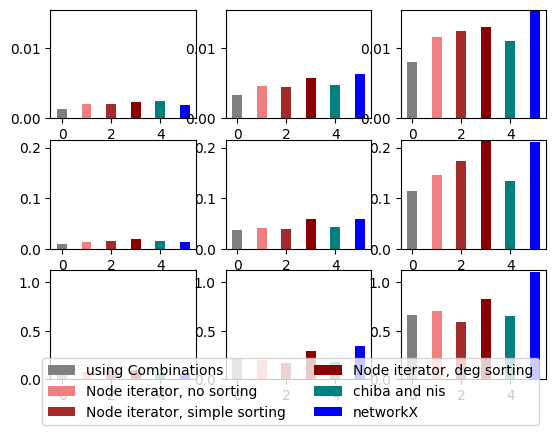

In [9]:
# Was sind die Dichten der Kanten
p_array = [[0.05, 0.15, 0.3] for entry in n_array]
# run and plot algorithms for k Iterations
k = 10
PerfTri.test_and_plot_results(n_array, p_array, functions, names, k, colors=colors, netx=[5], useGnp=True)

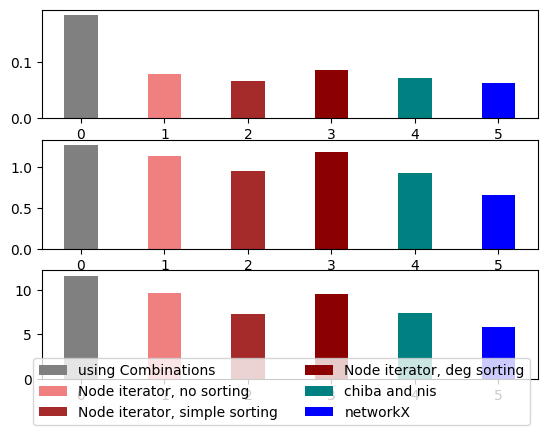

In [11]:
# test die Algorithmen für fully-connected Graphs
PerfTri.test_and_plot_fully_connected(n_array, functions, names, 1, colors, netx=[5])

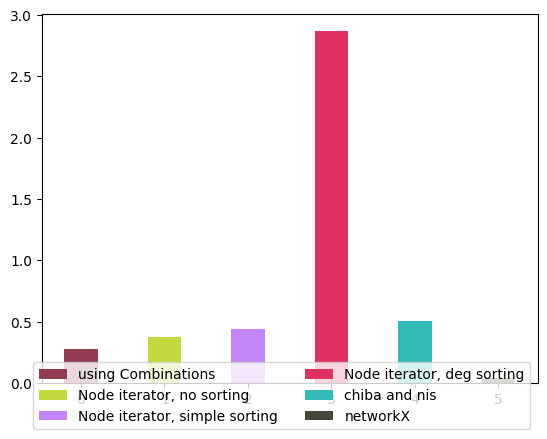

In [9]:
# Teste das Ganze für die Power Networks
normalTests = powerNetTest.TestTriangleImplementationPowerNetworks(functions, names, 
                                                                   "networks/power_networks/", [5])
normalTests.plot_and_run()

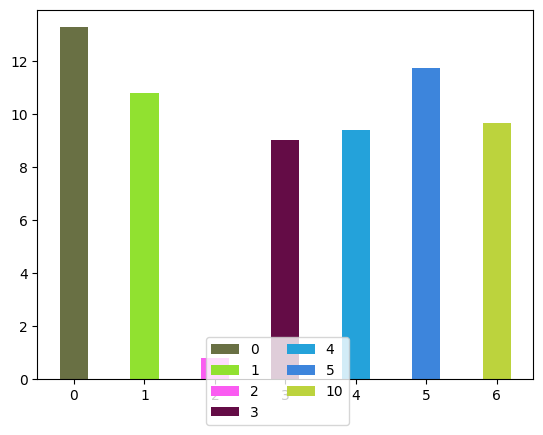

In [10]:
# Teste den ayz Algorithmus für verschiedene gamma
ayzTests = powerNetTest.TestAYZImplementationOnPowerNetworks([0, 1, 2, 3, 4, 5, 10], "networks/power_networks/")
ayzTests.plot_and_run()